# Reading Training Data

In [42]:
%matplotlib inline
import scipy.io as spio
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
mat = spio.loadmat('ISI_BN_Trn18000Tst4000(XBN).mat', squeeze_me=True)

In [61]:
org_train_x = mat['org_train_x']

In [68]:
org_train_y = mat['org_train_y']



In [51]:
train_X = np.load('./train_X_200x200.npy')

In [63]:
train_X = np.empty((18000, 32, 32))

for i in range(0,18000):
    
    if i >= 3600 and i < 5400:
        img = np.rot90(org_train_x[i].reshape(28,28),k =3, axes=(0,1))
        img = np.fliplr(img)
    elif i >= 9000 and i < 10800:
        img = np.rot90(org_train_x[i].reshape(28,28),k =3, axes=(0,1))
        img = np.fliplr(img)
    elif i >= 12600 and i < 14400:
        img = np.rot90(org_train_x[i].reshape(28,28),k =3, axes=(0,1))
        img = np.fliplr(img)
    elif i>= 14400 and i < 16200:
        img = np.rot90(org_train_x[i].reshape(28,28),k =3, axes=(0,1))
        img = np.fliplr(img)
    else:
        img = org_train_x[i].reshape(28,28)
    height, width = img.shape[:2]
#     dst = cv2.resize(img, (5*width, 5*height), interpolation = cv2.INTER_CUBIC)

    x = np.pad(img,pad_width=2, mode='constant', constant_values=[0])
#     im = Image.fromarray(x)
#     im.save("sample.png")
#     plt.imshow(x)
#     plt.show()
#     np.vstack((train_X, img))
#     train_X.vsta
#     train_X.append(img)
    train_X[i] = x

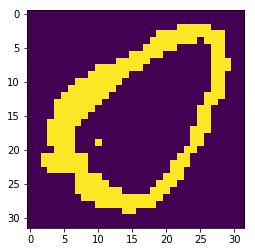

In [65]:
plt.imshow(train_X[])

# Shuffling & Train Test Split

In [69]:
x_train, y_train = shuffle(train_X, org_train_y)

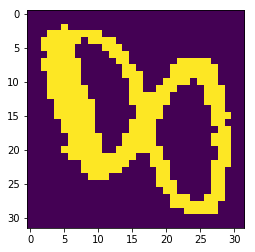

In [71]:
plt.imshow(x_train[0])

(18000, 200, 200)
(18000, 200, 200)
(18000, 10)
x_train shape: (18000, 200, 200, 1)
18000 train samples


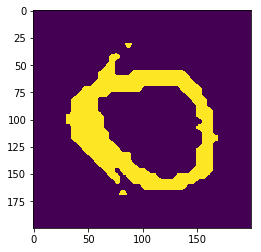

In [56]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

x_train = train_X

print(x_train.shape)

plt.imshow(x_train[1])

num_classes = 10

# input image dimensions
img_rows, img_cols = 200, 200

# the data, shuffled and split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shuffle dataset
x_train, y_train = shuffle(train_X, train_Y)

# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

print(x_train.shape)
# print(x_test.shape)
print(y_train.shape)
# print(y_test.shape)

# input_shape = (200, 200)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = org_train_y
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(128, kernel_size=(17, 17),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(10, 10)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

filepath="weights2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [57]:
batch_size = 20
epochs = 400

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          validation_split=.33,
          batch_size=batch_size,
          callbacks=callbacks_list, verbose=1,
#           validation_data=(x_test, y_test),
          epochs=epochs)

Train on 12059 samples, validate on 5941 samples
Epoch 1/400
12059/12059 [==============================] - 59s 5ms/step - loss: 1.9908 - acc: 0.1485 - val_loss: 7.0230 - val_acc: 0.0000e+00
Epoch 2/400
12059/12059 [==============================] - 56s 5ms/step - loss: 1.9457 - acc: 0.1456 - val_loss: 7.3464 - val_acc: 0.0000e+00
Epoch 3/400
12059/12059 [==============================] - 56s 5ms/step - loss: 1.9440 - acc: 0.1465 - val_loss: 7.6111 - val_acc: 0.0000e+00
Epoch 4/400
 9680/12059 [=======================>......] - ETA: 9s - loss: 1.9429 - acc: 0.1512

KeyboardInterrupt: 

In [49]:
y_train.shape

(18000, 10)

In [50]:
x_train.shape

(12060, 200, 200, 1)